In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.optimize import minimize  # for optimization

In [2]:
def J(theta):
    return (theta[0] - 5) ** 2 + (theta[1] - 5) ** 2

In [31]:
t0 = np.linspace(-10, 10, 100)
t1 = np.linspace(-10, 10, 100)

T0, T1 = np.meshgrid(t0, t1)
Z = (T0 - 5) ** 2 + (T1 - 5) ** 2

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T0, T1, Z, cmap=plt.cm.rainbow)
cset = ax.contour(T0, T1, Z, 20, zdir='Z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
cset = plt.contour(T0, T1, Z, 20, zdir='Z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [ ]:
minimize(J, x0=[0, 0], method='CG')

In [ ]:
minimize(J, x0=np.random.randn(2), method='CG')

In [ ]:
result = minimize(J, x0=np.random.randn(2), method='CG')
result.x  

In [ ]:
minimize(J, x0=[0, 0], method='BFGS')

In [48]:
def gradients(theta):
    return np.array([2 * (theta[0] - 5), 2 * (theta[1] - 5)])

In [ ]:
gradients([5, 5])

In [ ]:
minimize(J, x0=np.random.randn(2), method='CG', jac=gradients)

In [ ]:
minimize(J, x0=np.random.randn(2), method='TNC', jac=gradients)

### another practice with Rosen Function 
#### sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0) 
#### The Rosenbrock function has a global minimum at (1,1,1,.....1) where f(x,y)=0. Many optimization algorithms are tested using this function to evaluate their performance in finding the minimum. 
#### $ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100 \cdot (x_{i+1} - x_i^2)^2 + (1 - x_i)^2\right]$

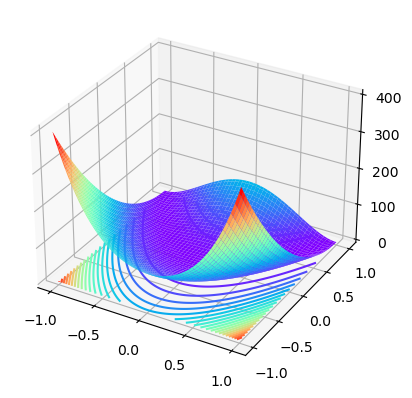

In [76]:
import numpy as np
from scipy.optimize import rosen
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, x)
Z = rosen([X, Y])
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow)
ax.contour(X, Y, Z, 20, zdir='Z', offset=0, cmap=plt.cm.rainbow)
plt.show()

/tmp/ipykernel_13998/1789868215.py:2: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  cset = plt.contour(X, Y, rosen([X, Y]), 20, zdir='Z', offset=0, cmap=plt.cm.rainbow)


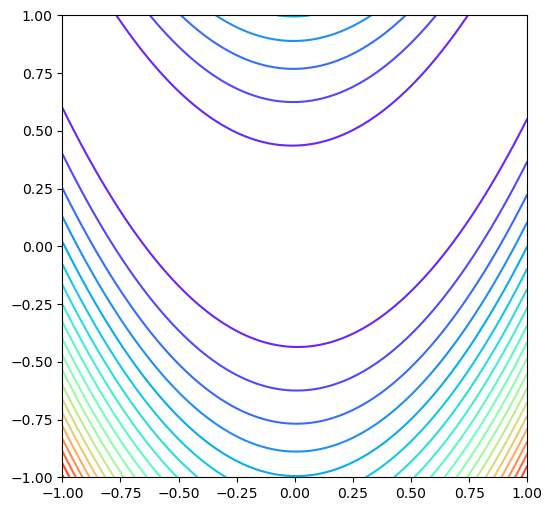

In [78]:
plt.figure(figsize=(6, 6))
cset = plt.contour(X, Y, rosen([X, Y]), 20, zdir='Z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [81]:
minimize(rosen, x0=np.random.randn(2), method='CG')

     fun: 1.7880715988177018e-12
     jac: array([4.26684829e-06, 3.67708930e-06])
 message: 'Optimization terminated successfully.'
    nfev: 171
     nit: 23
    njev: 57
  status: 0
 success: True
       x: array([1.00000133, 1.00000268])

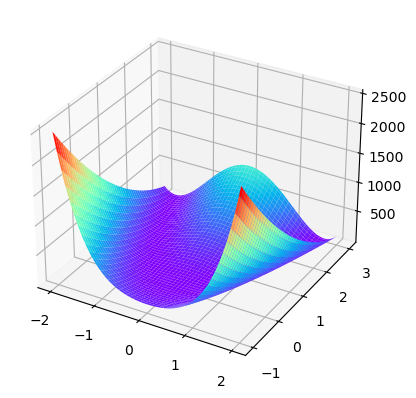

In [79]:
def rosenbrock(x, y):
    return 100.0 * (y - x**2.0)**2.0 + (1 - x)**2.0

def rosenbrock_gradient(x):
    n = len(x)
    gradient = np.zeros_like(x)

    for i in range(n - 1):
        gradient[i] = -400 * x[i] * (x[i + 1] - x[i]**2) - 2 * (1 - x[i])
        gradient[i + 1] = 200 * (x[i + 1] - x[i]**2)

    return gradient

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)

X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)


ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= plt.cm.rainbow)
plt.show()

In [83]:
minimize(rosen, x0=np.random.randn(2), method='CG')

     fun: 2.6398023657965767e-11
     jac: array([-7.04238358e-08, -6.23843932e-07])
 message: 'Optimization terminated successfully.'
    nfev: 163
     nit: 22
    njev: 54
  status: 0
 success: True
       x: array([0.99999486, 0.99998972])

In [85]:
minimize(rosen, x0=np.random.randn(2), method='CG', jac = rosenbrock_gradient)

     fun: 1.1628746646347621e-11
     jac: array([-5.93250856e-07,  3.70168118e-06])
 message: 'Optimization terminated successfully.'
    nfev: 65
     nit: 26
    njev: 61
  status: 0
 success: True
       x: array([1.00000341, 1.00000683])